# **IMPORTING NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **LOADING DATA**

In [42]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data)
print(test_data)
print(train_data.columns)
print(test_data.columns)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

# **DATA INSPECTION**

In [32]:
train_data.head()
train_data.info()
train_data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
test_data.head()
test_data.info()
test_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [37]:
print("The shape of train data is: ",train_data.shape)
print("The shape of test data is: ",test_data.shape)

The shape of train data is:  (889, 11)
The shape of test data is:  (418, 11)


# **MERGING BOTH DATA SETS**

In [70]:
df_merged = pd.concat([train_data, test_data], axis=0)
train_data.isnull().sum()
train_data.count()
df_merged.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df_merged.shape

(1309, 12)

# **DATA CLEANING**

In [71]:
# Check for missing values in the merged DataFrame
print("Missing values before cleaning:")
print(df_merged.isnull().sum())


Missing values before cleaning:
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [72]:
#Drop rows with missing values
df_merged.dropna(inplace=True)

#Remove duplicates
df_merged.drop_duplicates(inplace=True)

# Check for missing values in the cleaned merged DataFrame
print("\nMissing values after cleaning:")
print(df_merged.isnull().sum())

# Print the first few rows of the cleaned merged DataFrame
print("\nFirst few rows of the cleaned merged DataFrame:")
print(df_merged.head())

df_merged.shape


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

First few rows of the cleaned merged DataFrame:
    PassengerId  Survived  Pclass  \
1             2       1.0       1   
3             4       1.0       1   
6             7       0.0       1   
10           11       1.0       3   
11           12       1.0       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch 

(183, 12)

# **DATA VISUALIZATION**

**GRAPH FOR AGE**

Text(0.5, 1.0, 'Age Histogram')

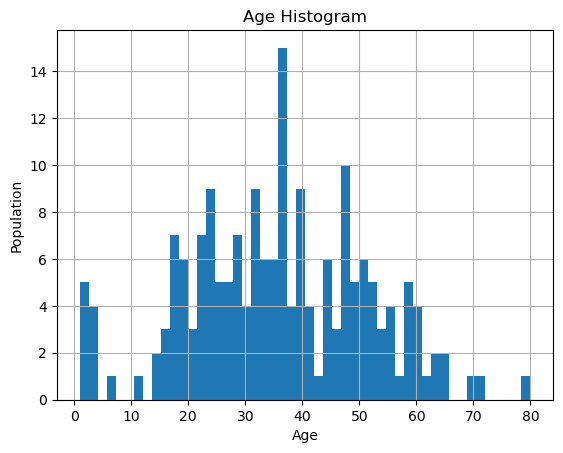

In [73]:
df_merged['Age'].hist(bins = 50)
plt.xlabel('Age')
plt.ylabel('Population')
plt.title('Age Histogram')

**PREDICTION FOR GENDER**

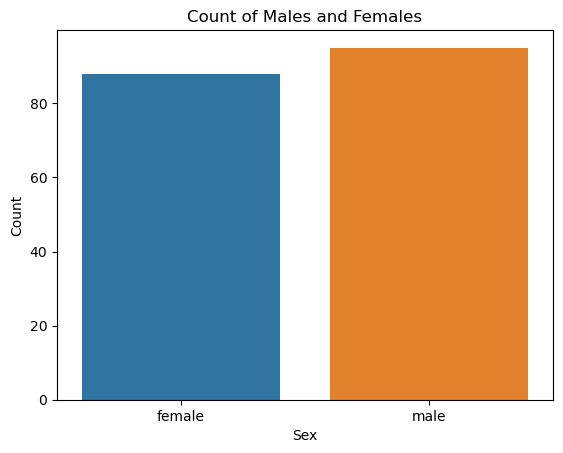

In [76]:
sns.countplot(data=df_merged, x='Sex')

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Males and Females')
plt.show()

**SURVIVED PASSENGERS**

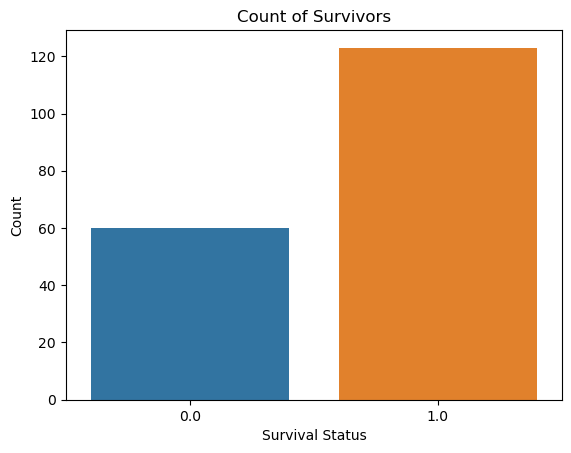

In [78]:
# Create the countplot
sns.countplot(data=df_merged, x='Survived')

# Add labels and title
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Count of Survivors')

# Show the plot
plt.show()

In [79]:
df_merged['Survived'].value_counts(normalize=True)

Survived
1.0    0.672131
0.0    0.327869
Name: proportion, dtype: float64

**SURVIVED PERCENTAGE BY P CLASS**

In [119]:
survival_percentage_by_class = df_merged.groupby('Pclass')['Survived'].mean() * 100

# Print the survival percentage by class
print("Survival Percentage by Ticket Class:")
print(survival_percentage_by_class)

Survival Percentage by Ticket Class:
Pclass
1    67.088608
2    80.000000
3    50.000000
Name: Survived, dtype: float64


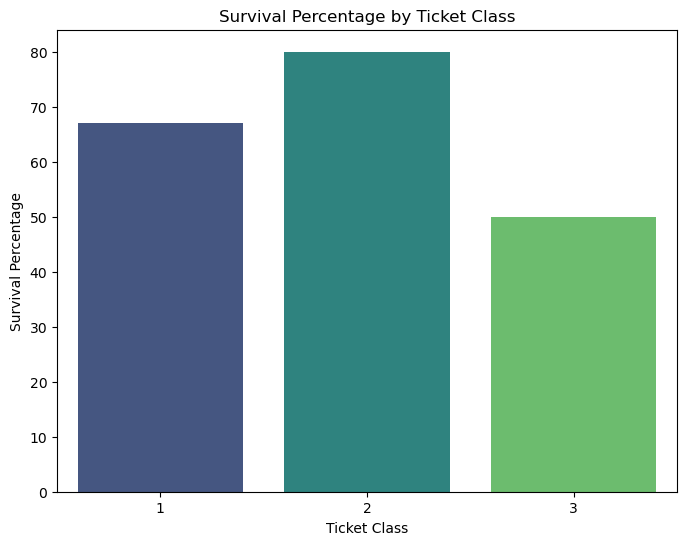

In [120]:
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_percentage_by_class.index, y=survival_percentage_by_class.values, palette='viridis')

# Set labels and title
plt.xlabel('Ticket Class')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage by Ticket Class')

# Show the plot
plt.show()

**AVERAGE AGE FOR P CLASS AND GENDER**


In [83]:
df_merged.groupby(['Pclass','Sex'])['Age'].mean().round()

Pclass  Sex   
1       female    34.0
        male      41.0
2       female    30.0
        male      19.0
3       female    17.0
        male      25.0
Name: Age, dtype: float64

**GENDER AND PCLASS**

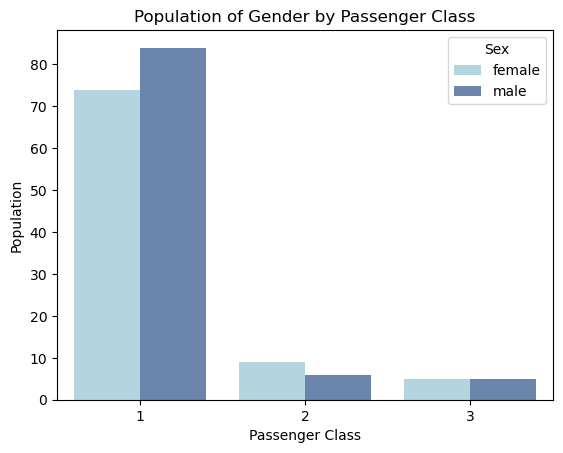

In [87]:
sns.countplot(data=df_merged, x='Pclass', hue='Sex', palette={'male': '#6082B6', 'female': 'lightblue'})
plt.title('Population of Gender by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Population')
plt.show()

**IDENTIFYING MALE FEMALES AND KIDS**

In [89]:
def mfc(mfc):
    Age, Sex = mfc

    if Age <17 :
        return 'Kid'

    else :
        return Sex

df_merged['age_group']=df_merged[['Age','Sex']].apply(mfc,axis=1) 
df_merged


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Kid
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1.0,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,female
872,873,0.0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,male
879,880,1.0,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,female
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female


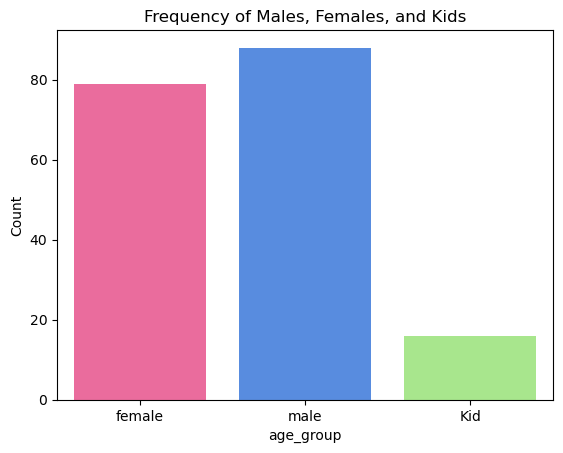

In [96]:
colors = ['#ff5798','#4287f5', '#a2f57e']

# Create a categorical plot to show the count of each age group category, split by gender
sns.countplot(data=df_merged, x='age_group', palette=colors)

# Set labels and title
plt.ylabel('Count')
plt.title('Frequency of Males, Females, and Kids')

# Show the plot
plt.show()

**CALCULATING COUNT OF MALES FEMALES AND KIDS**

In [111]:
male_counts = df_merged[df_merged['Sex'] == 'male']['Age'].value_counts().sort_index()
female_counts = df_merged[df_merged['Sex'] == 'female']['Age'].value_counts().sort_index()
kid_counts = df_merged[df_merged['age_group'] == 'Kid']['Age'].value_counts().sort_index()

# Print the counts for each age
print("Male counts for each age:")
print(male_counts)
print("\nFemale counts for each age:")
print(female_counts)
print("\nKid counts for each age:")
print(kid_counts)

Male counts for each age:
Age
0.92     1
1.00     1
2.00     1
3.00     1
4.00     1
6.00     1
11.00    1
17.00    1
18.00    1
19.00    3
21.00    1
23.00    1
24.00    2
25.00    3
26.00    1
27.00    3
28.00    2
29.00    2
30.00    1
31.00    3
32.00    2
33.00    1
34.00    1
35.00    2
36.00    7
36.50    1
37.00    3
38.00    2
39.00    1
40.00    2
42.00    3
44.00    1
45.00    3
45.50    1
46.00    2
47.00    4
48.00    3
49.00    3
50.00    2
51.00    1
52.00    2
54.00    2
55.00    1
56.00    2
58.00    2
60.00    1
61.00    2
62.00    1
64.00    1
65.00    2
70.00    1
71.00    1
80.00    1
Name: count, dtype: int64

Female counts for each age:
Age
2.0     2
4.0     2
14.0    1
15.0    1
16.0    3
17.0    2
18.0    3
19.0    3
21.0    2
22.0    3
23.0    3
24.0    7
25.0    1
27.0    2
29.0    3
30.0    3
31.0    2
32.0    1
32.5    1
33.0    3
34.0    1
35.0    4
36.0    4
38.0    2
39.0    4
40.0    2
41.0    1
43.0    1
44.0    2
47.0    1
48.0    2
49.0    2
50.0    

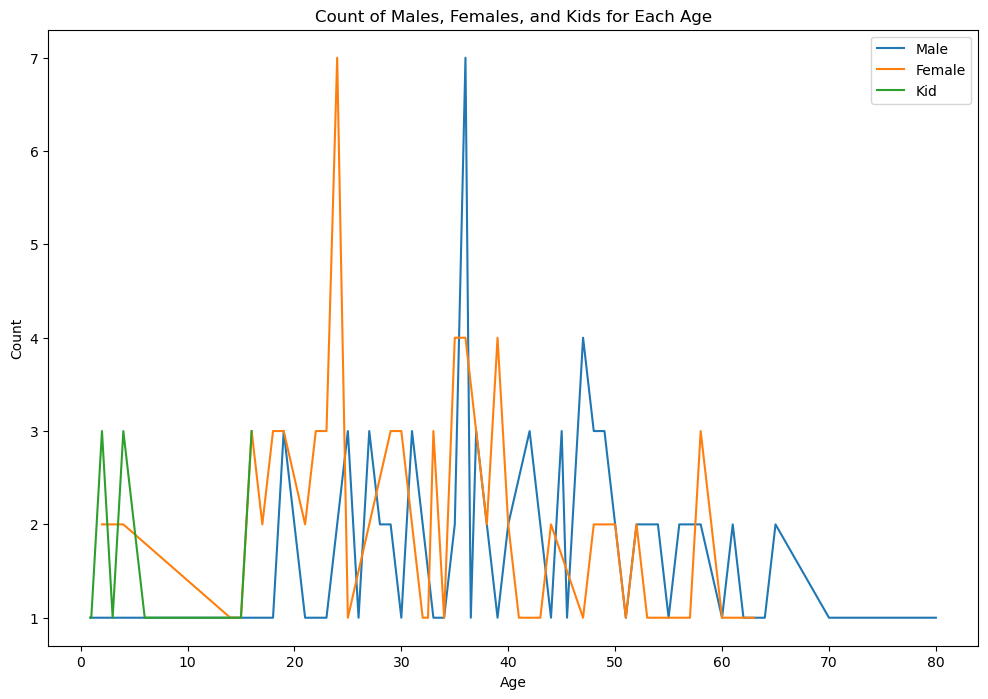

In [113]:
male_counts = df_merged[df_merged['Sex'] == 'male']['Age'].value_counts().sort_index()
female_counts = df_merged[df_merged['Sex'] == 'female']['Age'].value_counts().sort_index()
kid_counts = df_merged[df_merged['age_group'] == 'Kid']['Age'].value_counts().sort_index()

# Plot the counts of males, females, and kids for each age using a line plot
plt.figure(figsize=(12, 8))  # Set figure size
sns.lineplot(data=male_counts, label='Male')
sns.lineplot(data=female_counts, label='Female')
sns.lineplot(data=kid_counts, label='Kid')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Males, Females, and Kids for Each Age')
plt.legend()  # Show legend

# Show the plot
plt.show()

**NO OF SPOUSES/SIBLINGS**

In [109]:
with_sibsp = df_merged[df_merged['SibSp'] > 0]
num_passengers_with_sibsp = len(with_sibsp)

# Count the number of passengers not traveling with siblings or spouses (SibSp == 0)
passengers_without_sibsp = df_merged[df_merged['SibSp'] == 0]
num_passengers_without_sibsp = len(passengers_without_sibsp)

print("Number of passengers traveling with siblings or spouses (SibSp > 0):", num_passengers_with_sibsp)
print("Number of passengers not traveling with siblings or spouses (SibSp = 0):", num_passengers_without_sibsp)

Number of passengers traveling with siblings or spouses (SibSp > 0): 73
Number of passengers not traveling with siblings or spouses (SibSp = 0): 110


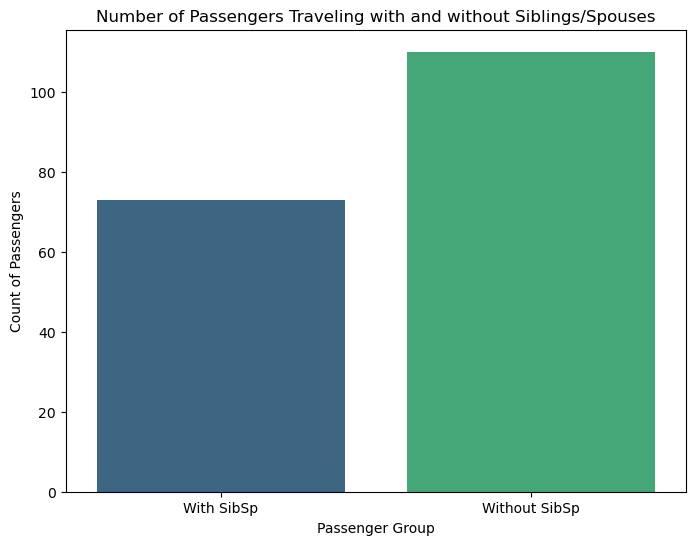

In [110]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['With SibSp', 'Without SibSp'], y=[num_passengers_with_sibsp, num_passengers_without_sibsp], palette='viridis')

# Set labels and title
plt.xlabel('Passenger Group')
plt.ylabel('Count of Passengers')
plt.title('Number of Passengers Traveling with and without Siblings/Spouses')

# Show the plot
plt.show()

**FARE DISTRUBUTION ACROSS DIFFERENT CLASSES**

In [115]:
fare_stats_by_class = df_merged.groupby('Pclass')['Fare'].describe()

# Print the descriptive statistics
print("Descriptive Statistics of Fare by Ticket Class:")
print(fare_stats_by_class)

Descriptive Statistics of Fare by Ticket Class:
        count       mean        std    min      25%       50%        75%  \
Pclass                                                                     
1       158.0  88.683228  77.513953   0.00  36.2500  71.14165  108.28125   
2        15.0  18.444447  10.141895  10.50  11.6875  13.00000   26.00000   
3        10.0  11.027500   3.531942   7.65   7.7500  10.46250   12.47500   

             max  
Pclass            
1       512.3292  
2        39.0000  
3        16.7000  


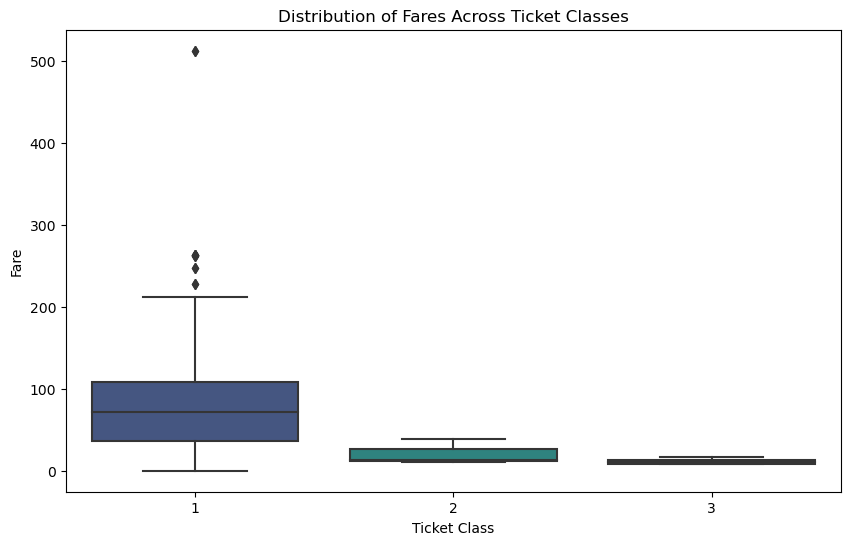

In [118]:
plt.figure(figsize=(10, 6))

# Create a boxplot to visualize the fare distribution for each ticket class
sns.boxplot(data=df_merged, x='Pclass', y='Fare', palette='viridis')

# Set labels and title
plt.xlabel('Ticket Class')
plt.ylabel('Fare')
plt.title('Distribution of Fares Across Ticket Classes')

# Show the plot
plt.show()

# CONCLUSION

In [ ]:
In this notebook containing the titanic data, I have performed cleaning and EDA and the results were:
Through graphical analysis using various plots such as bar plots and boxplots, I effectively explored and visualized different aspects of the dataset.
These visualizations provided clear insights into the relationships between variables such as ticket class, gender, and survival rate.
By analyzing the data, it is  evident that passengers in higher ticket classes had a better chance of survival compared to those in lower classes. 
Additionally, females had a significantly higher survival rate compared to males across all ticket classes.
Passengers in higher classes not only paid higher fares but also had better chances of survival, underscoring the influence of socioeconomic status on survival. 
Further analysis could explore additional factors contributing to survival, such as gender and age.
There is still more analysis that could be performed on this dataset. I haveve only scratched the surface.